### Import Libraries

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
import re

### Load the page

In [215]:
# Load webpage content
r = requests.get('https://vikingsterritory.com/2022/general-news/the-nfls-top-qbs-in-2021-per-pff-qbr-passer-rating-formula')

# Convert to a BeautifulSoup object
soup = bs(r.content)

<!DOCTYPE html>
<html class="no-js" lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <title>
   The NFL's Top QBs in 2021 per PFF, QBR, Passer Rating Formula - Vikings Territory
  </title>
  <link href="https://vikingsterritory.com/wp-content/uploads/2021/03/cropped-F6E72325-942F-4416-ADA7-DA2B9A1A63B7-scaled-1-32x32.jpeg" rel="icon" sizes="32x32"/>
  <link href="https://vikingsterritory.com/wp-content/uploads/2021/03/cropped-F6E72325-942F-4416-ADA7-DA2B9A1A63B7-scaled-1-192x192.jpeg" rel="icon" sizes="192x192"/>
  <link href="https://vikingsterritory.com/wp-content/uploads/2021/03/cropped-F6E72325-942F-4416-ADA7-DA2B9A1A63B7-scaled-1-180x180.jpeg" rel="apple-touch-icon"/>
  <meta content="https://vikingsterritory.com/wp-content/uploads/2021/03/cropped-F6E72325-942F-4416-ADA7-DA2B9A1A63B7-scaled-1-270x270.jpeg" name="msapplication-TileImage"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta cont

### Extract the player names and grades

In [216]:
h2 = soup.select('h2')
strings = [string['id'] for string in h2]
for string in strings:  # For loop to extract the names within the strings
    start = 4
    stop = -8
    names0 = [str(string[start:stop]) for string in strings] # Make a list of player names
print(names0)

['-zach-wilson-', '-sam-darnold-', '-justin-fields-', '-trevor-lawrence-', '-ben-roethlisberger-', '-davis-mills-', '-baker-mayfield-', '-taylor-heinicke-', '-jared-goff-', '-tyler-huntley-', '-taysom-hill', '-daniel-jones-', '-tua-tagovailoa-', '-lamar-jackson-', '-matt-ryan-', '-teddy-bridgewater-', '-carson-wentz-', '-jalen-hurts-', '-derek-carr', '-mac-jones', '-jimmy-garoppolo', '-russell-wilson-', '-ryan-tannehill-', '-patrick-mahomes', '-jameis-winston', 'dak-prescott-', 'kyler-murray-', 'kirk-cousins-', 'josh-allen-', 'matthew-stafford-', 'joe-burrow-', 'justin-herbert-', 'tom-brady', 'aaron-rodgers']


In [217]:
# Create pandas series for the names
names = pd.Series(['-zach-wilson-', '-sam-darnold-', '-justin-fields-', '-trevor-lawrence-', '-ben-roethlisberger-', '-davis-mills-', '-baker-mayfield-', '-taylor-heinicke-', '-jared-goff-', '-tyler-huntley-', '-taysom-hill', '-daniel-jones-', '-tua-tagovailoa-', '-lamar-jackson-', '-matt-ryan-', '-teddy-bridgewater-', '-carson-wentz-', '-jalen-hurts-', '-derek-carr', '-mac-jones', '-jimmy-garoppolo', '-russell-wilson-', '-ryan-tannehill-', '-patrick-mahomes', '-jameis-winston', 'dak-prescott-', 'kyler-murray-', 'kirk-cousins-', 'josh-allen-', 'matthew-stafford-', 'joe-burrow-', 'justin-herbert-', 'tom-brady', 'aaron-rodgers'])

In [218]:
# Edit the names
names = names.str.replace('-',' ') # Remove hyphens
names = names.str.title() # Capitalize the names
names

0             Zach Wilson 
1             Sam Darnold 
2           Justin Fields 
3         Trevor Lawrence 
4      Ben Roethlisberger 
5             Davis Mills 
6          Baker Mayfield 
7         Taylor Heinicke 
8              Jared Goff 
9           Tyler Huntley 
10             Taysom Hill
11           Daniel Jones 
12         Tua Tagovailoa 
13          Lamar Jackson 
14              Matt Ryan 
15      Teddy Bridgewater 
16           Carson Wentz 
17            Jalen Hurts 
18              Derek Carr
19               Mac Jones
20         Jimmy Garoppolo
21         Russell Wilson 
22         Ryan Tannehill 
23         Patrick Mahomes
24          Jameis Winston
25           Dak Prescott 
26           Kyler Murray 
27           Kirk Cousins 
28             Josh Allen 
29       Matthew Stafford 
30             Joe Burrow 
31         Justin Herbert 
32               Tom Brady
33           Aaron Rodgers
dtype: object

In [219]:
# Select grades
p = soup.select('p')
grades = [grade.find(string = re.compile('PFF = ')) for grade in p]
# Remove the None results
grades = [grade for grade in grades if grade]
grades_df = pd.DataFrame([grades]) # Convert to Pandas Df

### Prepare the DataFrame

In [220]:
grades_df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,"PFF = 59.3, QBR = 28.5, P-Rating = 69.7","PFF = 55.2, QBR = 33.3, P-Rating = 71.9","PFF = 64.2, QBR = 26.0, P-Rating = 73.2","PFF = 59.6, QBR = 33.6, P-Rating = 71.9","PFF = 56.2, QBR = 35.8, P-Rating = 86.8","PFF = 58.3, QBR = 35.6, P-Rating = 88.8","PFF = 63.6, QBR = 35.3, P-Rating = 83.1","PFF = 59.4, QBR = 40.3, P-Rating = 85.9","PFF = 60.7, QBR = 39.0, P-Rating = 91.5","PFF = 68.3, QBR = 48.3, P-Rating = 76.6",...,"PFF = 74.2, QBR = 64.6, P-Rating = 102.8","PFF = 83.8, QBR = 54.9, P-Rating = 104.2","PFF = 84.0, QBR = 56.8, P-Rating = 100.6","PFF = 88.2, QBR = 51.9, P-Rating = 103.1","PFF = 86.5, QBR = 61.0, P-Rating = 92.2","PFF = 80.7, QBR = 63.5, P-Rating = 102.9","PFF = 91.7, QBR = 54.4, P-Rating = 108.3","PFF = 90.1, QBR = 66.1, P-Rating = 97.7","PFF = 92.0, QBR = 68.5, P-Rating = 102.1","PFF = 90.0, QBR = 68.8 , P-Rating = 111.9"


In [221]:
# One row --> one row for each player
grades_df = grades_df.unstack().reset_index(drop=True).to_frame()
grades_df

,0
0,"PFF = 59.3, QBR = 28.5, P-Rating = 69.7"
1,"PFF = 55.2, QBR = 33.3, P-Rating = 71.9"
2,"PFF = 64.2, QBR = 26.0, P-Rating = 73.2"
3,"PFF = 59.6, QBR = 33.6, P-Rating = 71.9"
4,"PFF = 56.2, QBR = 35.8, P-Rating = 86.8"
5,"PFF = 58.3, QBR = 35.6, P-Rating = 88.8"
6,"PFF = 63.6, QBR = 35.3, P-Rating = 83.1"
7,"PFF = 59.4, QBR = 40.3, P-Rating = 85.9"
8,"PFF = 60.7, QBR = 39.0, P-Rating = 91.5"
9,"PFF = 68.3, QBR = 48.3, P-Rating = 76.6"


In [222]:
# Give the column with the values a proper name
grades_df = grades_df.rename(columns={0:'Grades'})
# Split based on the commas to make each metric its own column
grades_df = grades_df['Grades'].str.split(',', expand = True)
# Rename the columns to match the corresponding metric
grades_df = grades_df.rename(columns={0:'PFF Grade', 1: 'QBR', 2: 'Passer Rating'})
grades_df

,PFF Grade,QBR,Passer Rating
0,PFF = 59.3,QBR = 28.5,P-Rating = 69.7
1,PFF = 55.2,QBR = 33.3,P-Rating = 71.9
2,PFF = 64.2,QBR = 26.0,P-Rating = 73.2
3,PFF = 59.6,QBR = 33.6,P-Rating = 71.9
4,PFF = 56.2,QBR = 35.8,P-Rating = 86.8
5,PFF = 58.3,QBR = 35.6,P-Rating = 88.8
6,PFF = 63.6,QBR = 35.3,P-Rating = 83.1
7,PFF = 59.4,QBR = 40.3,P-Rating = 85.9
8,PFF = 60.7,QBR = 39.0,P-Rating = 91.5
9,PFF = 68.3,QBR = 48.3,P-Rating = 76.6


In [223]:
# Remove the text from each entry since we already have the column titles
for i in grades_df.columns:
    grades_df[i] = grades_df[i].astype('str').str.extract('(\d*\.\d+|\d+)').astype(float)
grades_df

,PFF Grade,QBR,Passer Rating
0,59.3,28.5,69.7
1,55.2,33.3,71.9
2,64.2,26.0,73.2
3,59.6,33.6,71.9
4,56.2,35.8,86.8
5,58.3,35.6,88.8
6,63.6,35.3,83.1
7,59.4,40.3,85.9
8,60.7,39.0,91.5
9,68.3,48.3,76.6


In [224]:
# Drop the passer rating metric, and then combine grades and players into a dataframe
grades_df = grades_df.drop(columns = 'Passer Rating')
# Dataframe matching player names with their grades
pff_qbr_2021 = grades_df.set_index(names)
pff_qbr_2021.index.name='Player Name'
pff_qbr_2021

,PFF Grade,QBR
Player Name,,
Zach Wilson,59.3,28.5
Sam Darnold,55.2,33.3
Justin Fields,64.2,26.0
Trevor Lawrence,59.6,33.6
Ben Roethlisberger,56.2,35.8
Davis Mills,58.3,35.6
Baker Mayfield,63.6,35.3
Taylor Heinicke,59.4,40.3
Jared Goff,60.7,39.0


In [225]:
# Mention how this ordering of names was predetermined based on some calculation on the website you got the numbers from
# I could reorder based on some average of the two
# Ultimately the visualization is what will matter so the table ordering is not as important

### Visualization

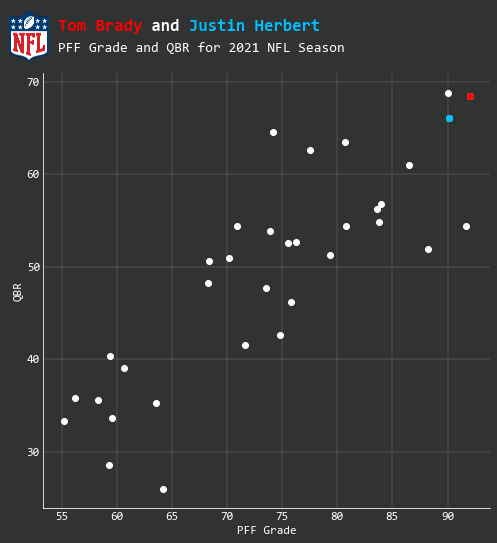

In [286]:
# Graph
fig, ax = plt.subplots(figsize = (8,8))

# Colors, font, and fontsize 
text_c = 'White'
markers_c = ''
plt.rcParams['font.family'] = 'Consolas'
plt.rcParams.update({'font.size': 12})

# Background
background='#313332'
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# Grid
ax.grid(linewidth=.25, zorder=1)

# Add the values
x = pff_qbr_2021['PFF Grade']
y = pff_qbr_2021['QBR']
ax.scatter(x,y,zorder = 2, color = text_c)
ax.scatter(x.iloc[32],y.iloc[32], zorder=3, color = 'red')
ax.scatter(x.iloc[31],y.iloc[31], zorder=3, color = 'deepskyblue')

# Labels
ax.set_xlabel('PFF Grade', color=text_c)
ax.set_ylabel('QBR', color=text_c)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Bottom and left spine edit
ax.spines['bottom'].set_color(text_c)
ax.spines['left'].set_color(text_c)

# Remove the ticks
ax.tick_params(axis='both', length=0, colors=text_c)

# Title 
from highlight_text import HighlightText, ax_text, fig_text

fig_text(x=0.15, y=.975,s='<Tom Brady> and <Justin Herbert>',highlight_textprops=[{"color": 'red'}, {"color": 'deepskyblue'}], fontsize = 17, color = text_c, fontweight = 'bold')
fig_text(x=0.15, y=.935,s= 'PFF Grade and QBR for 2021 NFL Season', color = text_c, fontsize = 14,fontweight = 'regular')

# NFL logo (to go to the far left on the title level)
import matplotlib.image as image

logo = fig.add_axes([.05,.895,.1,.1])
logo.axis('off')
img =image.imread('nfl-logo-png-1752.png')
logo.imshow(img)

# Save
plt.savefig(fname = 'PFF Grade and QBR for Tom Brady and Justin Herbert vs rest of NFL', dpi=400, format='png')